In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS,WordCloud
path = "./GBvideos.csv"
GBVideos = pd.read_csv(path)

In [3]:
import json
f = open("./GB_category_id.json")
data = f.read()
f.close()
out = json.loads(data)
categories = pd.DataFrame([
    {'category_id':x['id'],
     'category':x['snippet']['title'],
     'assignable':x['snippet']['assignable']
    } for x in out['items']
])
categories['category_id'] = categories['category_id'].astype(int)
categories.head()

,category_id,category,assignable
0,1,Film & Animation,True
1,2,Autos & Vehicles,True
2,10,Music,True
3,15,Pets & Animals,True
4,17,Sports,True


In [4]:
GBVideos['category_id'] = GBVideos['category_id'].astype(int)
GBVideos = GBVideos.merge(categories, on='category_id')
GBVideos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,assignable
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Howto & Style,True
1,MyEqfBkzESU,17.14.11,EXTREME GOLDEN TAN TRANSFORMATION,John Maclean,26,2017-11-10T20:40:44.000Z,"Extreme Tan|""Tanning""|""Tanning Bed""|""How to ge...",300617,8133,2693,2911,https://i.ytimg.com/vi/MyEqfBkzESU/default.jpg,False,False,False,-\n\n\nWebsite - http://www.johnmaclean.co.uk\...,Howto & Style,True
2,b4vTZx_AtHk,17.14.11,How To Dry a Shirt in 30 Seconds,HowToBasic,26,2017-11-09T18:36:48.000Z,"how to dry a shirt in 30 seconds|""how to dry a...",2063667,98804,11682,11443,https://i.ytimg.com/vi/b4vTZx_AtHk/default.jpg,False,False,False,Today I show you how to completely dry a shirt...,Howto & Style,True
3,OWvCCu2t6Ts,17.14.11,SO Much To Tell You | 32 Weeks Pregnant | MOTH...,Sprinkleofglitter,26,2017-11-10T16:59:50.000Z,"sprinkleofglitter|""sprinkle of glitter""|""Louis...",238843,10028,248,650,https://i.ytimg.com/vi/OWvCCu2t6Ts/default.jpg,False,False,False,A big chat about everything going on in my pre...,Howto & Style,True
4,9GqL1DSQDL0,17.14.11,GET READY WITH ME + LILY! (we're so immature bye),makeupbymichaelfinch,26,2017-11-09T22:00:00.000Z,"Lily brown|""michael finch""|""makeupbymichaelfin...",332967,22303,700,1523,https://i.ytimg.com/vi/9GqL1DSQDL0/default.jpg,False,False,False,Hey babes! Happy Friday! It's the WEEKENDDD He...,Howto & Style,True


In [5]:
GBVideos.fillna(" ",inplace=True)
GBVideos = GBVideos.drop_duplicates()
GBVideos.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,assignable
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Howto & Style,True
1,MyEqfBkzESU,17.14.11,EXTREME GOLDEN TAN TRANSFORMATION,John Maclean,26,2017-11-10T20:40:44.000Z,"Extreme Tan|""Tanning""|""Tanning Bed""|""How to ge...",300617,8133,2693,2911,https://i.ytimg.com/vi/MyEqfBkzESU/default.jpg,False,False,False,-\n\n\nWebsite - http://www.johnmaclean.co.uk\...,Howto & Style,True
2,b4vTZx_AtHk,17.14.11,How To Dry a Shirt in 30 Seconds,HowToBasic,26,2017-11-09T18:36:48.000Z,"how to dry a shirt in 30 seconds|""how to dry a...",2063667,98804,11682,11443,https://i.ytimg.com/vi/b4vTZx_AtHk/default.jpg,False,False,False,Today I show you how to completely dry a shirt...,Howto & Style,True


In [6]:
GBVideos.describe()

,category_id,views,likes,dislikes,comment_count
count,38655.000000,3.865500e+04,3.865500e+04,3.865500e+04,3.865500e+04
mean,16.797128,5.915929e+06,1.341478e+05,7.482788e+03,1.291235e+04
std,7.739012,1.903104e+07,3.488318e+05,5.048247e+04,4.958595e+04
min,1.000000,8.510000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,10.000000,2.514615e+05,5.901500e+03,2.000000e+02,6.780000e+02
50%,20.000000,9.799680e+05,2.517200e+04,8.200000e+02,2.477000e+03
75%,24.000000,3.684465e+06,1.141555e+05,3.356000e+03,9.242000e+03
max,43.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


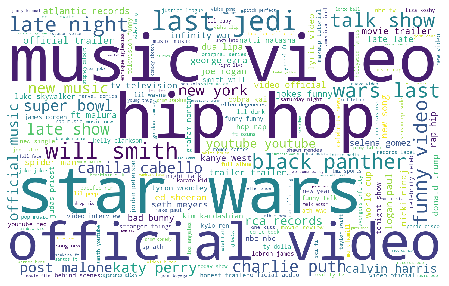

In [7]:
tags = GBVideos['tags'].map(lambda x:x.lower().split('|')).values
splt_tags = ' '.join(GBVideos['tags'])
wordcloud = WordCloud(width=1600,height=1000, background_color="white").generate(' '.join(splt_tags.lower().split('|')))

plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

wordcloud.to_file('./tagcloud.png')

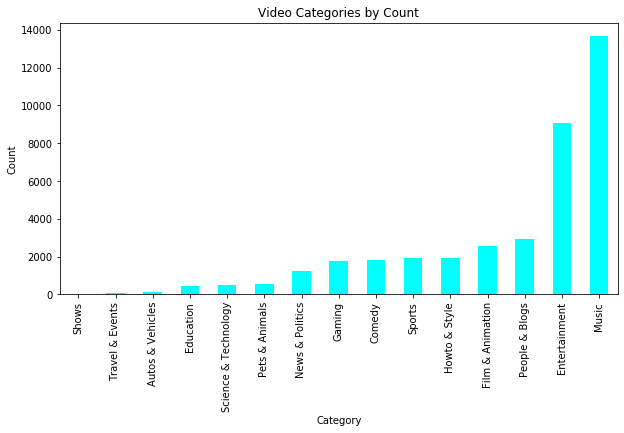

In [8]:
GBVideos_gb = GBVideos.groupby('category').count()['title']
GBVideos_gb = GBVideos_gb.rename(columns=['category','count']).sort_values()
ax = GBVideos_gb.plot(kind='bar',title='Video Categories by Count',color='cyan',figsize=(10,5))
ax.set_xlabel('Category')
ax.set_ylabel('Count')
plt.savefig('category_count.png')

category
Autos & Vehicles         24951.285714
Comedy                   60847.082927
Education                27664.459459
Entertainment            62986.086247
Film & Animation         40342.348485
Gaming                   26213.703488
Howto & Style            19128.484211
Music                   254133.744584
News & Politics          15503.976378
People & Blogs           33235.528369
Pets & Animals           22603.268293
Science & Technology     42971.523810
Shows                    44588.000000
Sports                   17356.943396
Travel & Events           9707.600000
Name: likes, dtype: float64


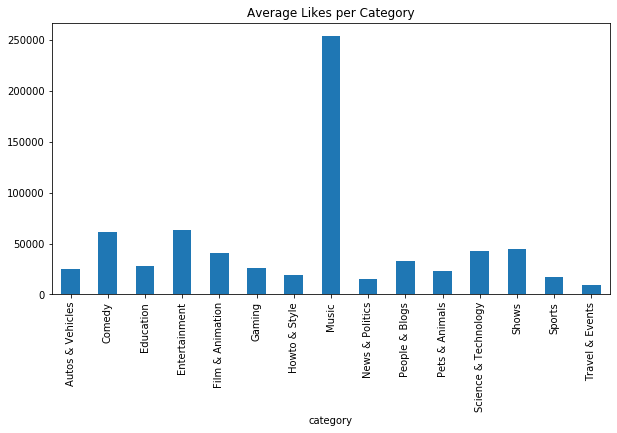

In [9]:
GBVideos_likes = GBVideos.sort_values('likes', ascending=False).drop_duplicates('video_id').sort_index()
GBVideos_likes.groupby('category').likes.mean().plot(kind="bar", figsize=(10,5))
print(GBVideos_likes.groupby('category').likes.mean())
plt.title("Average Likes per Category")
plt.savefig('avglikes_category.png')
plt.show()

category
Autos & Vehicles           349318
Comedy                   12473652
Education                 1023585
Entertainment            54042062
Film & Animation          7987785
Gaming                    4508757
Howto & Style             3634412
Music                   222875294
News & Politics           1969005
People & Blogs            9372419
Pets & Animals             926734
Science & Technology      1804804
Shows                       44588
Sports                    3679672
Travel & Events             97076
Name: likes, dtype: int64


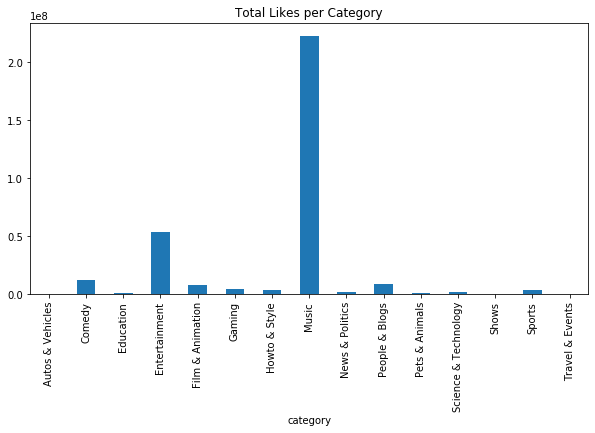

In [10]:
GBVideos_likes.groupby('category').likes.sum().plot(kind="bar",figsize=(10,5))
print(GBVideos_likes.groupby('category').likes.sum())
plt.title("Total Likes per Category")
plt.savefig('totallikes_category.png')
plt.show()

category
Autos & Vehicles         1741.000000
Comedy                   2182.039024
Education                1130.432432
Entertainment            7871.708625
Film & Animation         2111.691919
Gaming                   1038.017442
Howto & Style             638.252632
Music                   10620.592930
News & Politics          2077.566929
People & Blogs           2806.936170
Pets & Animals            545.000000
Science & Technology     2230.285714
Shows                     360.000000
Sports                   1803.617925
Travel & Events           384.300000
Name: dislikes, dtype: float64


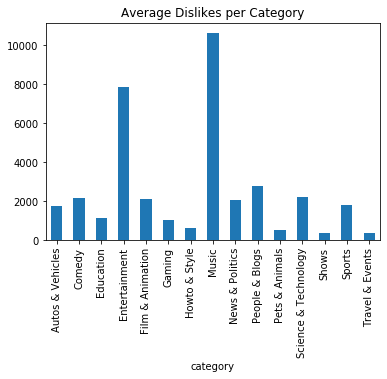

In [11]:
GBVideos_likes.groupby('category').dislikes.mean().plot(kind="bar")
print(GBVideos_likes.groupby('category').dislikes.mean())
plt.title("Average Dislikes per Category")
plt.savefig('avg_dislikes_category.png')
plt.show()

category
Autos & Vehicles          24374
Comedy                   447318
Education                 41826
Entertainment           6753926
Film & Animation         418115
Gaming                   178539
Howto & Style            121268
Music                   9314260
News & Politics          263851
People & Blogs           791556
Pets & Animals            22345
Science & Technology      93672
Shows                       360
Sports                   382367
Travel & Events            3843
Name: dislikes, dtype: int64


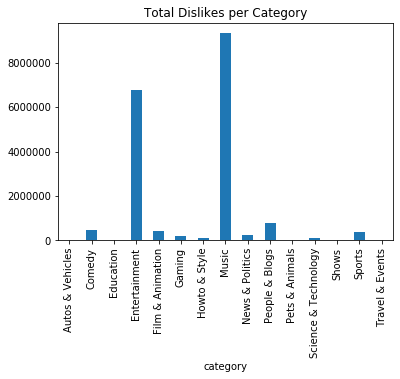

In [12]:
GBVideos_likes.groupby('category').dislikes.sum().plot(kind="bar")
print(GBVideos_likes.groupby('category').dislikes.sum())
plt.title("Total Dislikes per Category")
plt.savefig('total_dislikes_category.png')
plt.show()

category
Autos & Vehicles         3069.000000
Comedy                   6503.370732
Education                2835.378378
Entertainment           10032.025641
Film & Animation         4406.888889
Gaming                   3140.220930
Howto & Style            2480.189474
Music                   19803.244014
News & Politics          5125.196850
People & Blogs           4435.258865
Pets & Animals           2054.097561
Science & Technology     6724.000000
Shows                    4335.000000
Sports                   2579.042453
Travel & Events          1160.900000
Name: comment_count, dtype: float64


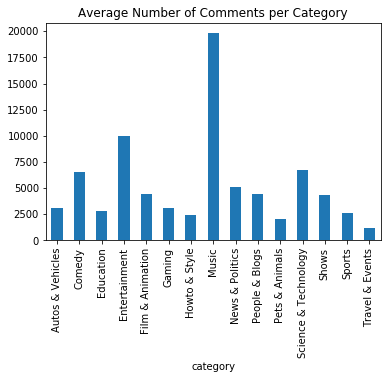

In [13]:
GBVideos_likes.groupby('category').comment_count.mean().plot(kind="bar")
print(GBVideos_likes.groupby('category').comment_count.mean())
plt.savefig('avg_comment_category.png')
plt.title("Average Number of Comments per Category")
plt.show()

category
Autos & Vehicles           42966
Comedy                   1333191
Education                 104909
Entertainment            8607478
Film & Animation          872564
Gaming                    540118
Howto & Style             471236
Music                   17367445
News & Politics           650900
People & Blogs           1250743
Pets & Animals             84218
Science & Technology      282408
Shows                       4335
Sports                    546757
Travel & Events            11609
Name: comment_count, dtype: int64


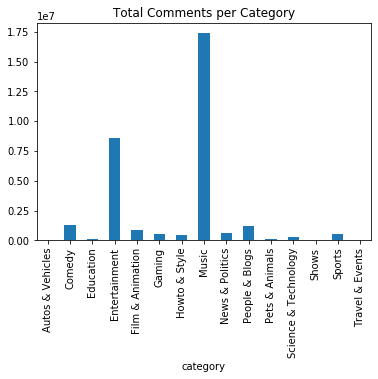

In [14]:
GBVideos_likes.groupby('category').comment_count.sum().plot(kind="bar")
print(GBVideos_likes.groupby('category').comment_count.sum())
plt.title("Total Comments per Category")
plt.savefig('total_comment_category.png')
plt.show()

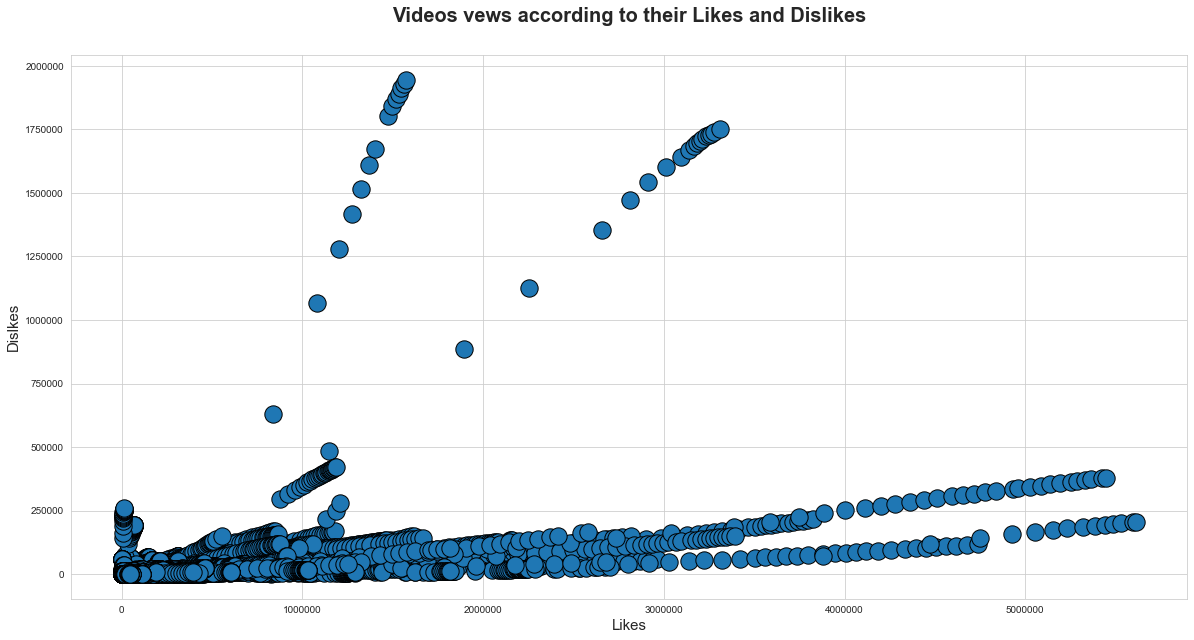

In [32]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
plt.title('Videos vews according to their Likes and Dislikes', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Likes', fontsize=15)
plt.ylabel('Dislkes', fontsize=15)

likes = GBVideos["likes"].values
dislikes = GBVideos["dislikes"].values
views = GBVideos["views"].values

plt.scatter(likes, dislikes, s = 300, edgecolors='black')
plt.show()

In [49]:
hist_data = [GBVideos["dislikes"].values, GBVideos["likes"].values]

group_labels = ['Dislikes distribution', 'Likes distribution']
colors = ['#A6ACEC', '#63F5EF']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, colors=colors,
                         bin_size=0.5, show_rug=False)

# Add title
fig['layout'].update(title='Likes vs dislikes', legend=dict(x=0.65, y=0.8))

# Plot!
py.iplot(fig, filename='Hist and Curve')

NameError: name 'ff' is not defined

In [35]:
entertainment_title = GBVideos["title"][(GBVideos['category'] == 'Entertainment')] 
news_politics_title = GBVideos["title"][(GBVideos['category'] == 'News & Politics')] 
people_title = GBVideos["title"][(GBVideos['category'] == 'People & Blogs')] 
music_title = GBVideos["title"][(GBVideos['category'] == 'Music')] 
sports_title = GBVideos["title"][(GBVideos['category'] == 'Sports')] 
comedy_title = GBVideos["title"][(GBVideos['category'] == 'Comedy')] 

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from pyLDAvis import sklearn

vectorizer_entertainment_title = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
entertainment_title_vectorized = vectorizer_entertainment_title.fit_transform(entertainment_title)
lda_popular_entertainment_title_vectorized = LatentDirichletAllocation(n_components=7, max_iter=5, learning_method='online',verbose=True)
entertainment_title_vectorized_lda = lda_popular_entertainment_title_vectorized.fit_transform(entertainment_title_vectorized )

pyLDAvis.enable_notebook()
dash = sklearn.prepare(lda_popular_entertainment_title_vectorized,
                       entertainment_title_vectorized, 
                       vectorizer_entertainment_title, 
                       mds='tsne', sort=True)
dash

<>:9: DeprecationWarning: invalid escape sequence \-
<>:9: DeprecationWarning: invalid escape sequence \-
<>:9: DeprecationWarning: invalid escape sequence \-
<ipython-input-46-7dbe56ffa579>:9: DeprecationWarning: invalid escape sequence \-
  vectorizer_entertainment_title = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')


iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5


/usr/local/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0     -29.594002  60.112713       1        1  16.055507
3     -45.996586  11.891685       2        1  15.367862
2      20.368856  70.019325       3        1  14.897202
5      53.928768  31.704309       4        1  14.830923
6     -12.437127 -26.423267       5        1  13.703884
1       3.965971  21.797720       6        1  12.672399
4      37.524284 -16.517805       7        1  12.472222, topic_info=     Category         Freq       Term        Total  loglift  logprob
1767  Default  1111.000000    trailer  1111.000000  30.0000  30.0000
1221  Default  1151.000000   official  1151.000000  29.0000  29.0000
1632  Default   598.000000       star   598.000000  28.0000  28.0000
1860  Default   558.000000       wars   558.000000  27.0000  27.0000
1830  Default   426.000000      video   426.000000  26.0000  26.0000
...       ...          ...        ...          ...      ...      ...
709    Topic7    38.587220     graham    39.402031   2.0608  -5.1363
1210   Topic7    38.587220     norton    39.402032   2.0608  -5.1363
224    Topic7    38.342173  bushworld    39.156509   2.0607  -5.1427
1193   Topic7    58.987703        new   283.612148   0.5114  -4.7119
1144   Topic7    38.990496      money    52.768314   1.7791  -5.1259

[265 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         5  0.995995        abc
15        6  0.993243       adam
20        1  0.981590  addresses
24        7  0.985453      adult
37        4  0.978874      album
...     ...       ...        ...
1934      6  0.987784       wwhl
1937      3  0.975543        xcx
1944      1  0.988201      young
1945      4  0.990814    youtube
1948      5  0.983926       yyxy

[254 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 6, 7, 2, 5])

In [16]:
#sns.pairplot(df,x_vars=['comment_count','views'],y_vars=['likes','dislikes'],size=5)
#plt.savefig('comments.png')

GBVideos["Text_Feature"] = GBVideos.title + " " + GBVideos.tags + " "
for i in range(3):
    GBVideos["Text_Feature"] = GBVideos["Text_Feature"]+ " "+ GBVideos.description + " " + GBVideos.channel_title + " "

In [20]:
def text_preprocess(text):
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',"", text)
    text = re.sub(r'\\n+'," ",text)
    text = text.replace("|"," ")
    text = re.sub(r'[?|!|\'|"|#|,|-|@|(|)]', "", text)
    text = text.replace(": "," ").replace("-"," ").replace(" :"," ")
    text = re.sub(r' +',' ',text).lower()
    return text

In [21]:
from gensim.models import Word2Vec
data = GBVideos['Text_Feature']
list_of_sent=[]
for sent in data.values:
    list_of_sent.append(sent.split())

In [22]:
lang_model = Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(lang_model.wv.vocab)

In [23]:
def avgw2v(list_of_sent):
    sent_vectors = []; 
    for sent in tqdm(list_of_sent):
        sent_vec = np.zeros(50)
        cnt_words =0; 
        for word in sent:
            if word in w2v_words:
                vec = w2v_model.wv[word]
                sent_vec += vec
                cnt_words += 1
        if cnt_words != 0:
            sent_vec /= cnt_words
        sent_vectors.append(sent_vec)
    print(len(sent_vectors))
    print(len(sent_vectors[0]))
    return sent_vectors
sent_vect = avgw2v(list_of_sent)

NameError: name 'tqdm' is not defined

In [ ]:
std = StandardScaler()
data_vect=std.fit_transform(sent_vect)

In [ ]:
def k_means(data,cluster_range):
  models=[]
  loss=[]
  for k in cluster_range:
    kmeans=KMeans(n_clusters=k,init='k-means++',n_jobs=-1).fit(data)
    models.append(kmeans)
    loss.append(kmeans.inertia_)
  plt.plot(cluster_range,loss)
  plt.xlabel('k-clusters')
  plt.ylabel('loss')
  plt.show()  
  return models

In [ ]:
def cluster_analysis(train_data,k):
  #For each cluster
  for i in range(0,k):
    #Extract cleaned text column
    data=train_data[train_data['labels']==i]['Text_Feature'].values
    list_of_words=[];
    for sent in data:
      for word in sent.split():
        list_of_words.append(word)
    final_text=" ".join(list_of_words)
    #print("Cluster : ",i+1)
    #print("Number of reviews",len(data))
    #print("      Word Cloud ")
    wordcloud = WordCloud(collocations=True).generate(final_text)
    plt.figure()
    title="\nCluster : "+str(i+1)+"\n Number of Reviews"+str(len(data))
    plt.title(title)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [ ]:
model_list=k_means(data_vect,range(2,50))
df['labels']=model_list[18].labels_
cluster_analysis(df_1,20)